## Working with Categorical Data in Python

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns = 20
pd.options.display.max_rows = 20
pd.options.display.max_colwidth = 80
np.set_printoptions(precision=4, suppress=True)

**Seaborn API Reference**

**Color palettes:** https://seaborn.pydata.org/tutorial/color_palettes.html

### 1. Introduction to Categorical Data

> #### Introduction

The `adult_census_income` dataset contains information on US adults and whether or not  
an adult makes over $50,000 annually.

In [2]:
# Load the dataset
adult = pd.read_csv("datasets/adult_census_income.csv")
adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Age              32561 non-null  int64 
 1   Workclass        32561 non-null  object
 2   fnlgwt           32561 non-null  int64 
 3   Education        32561 non-null  object
 4   Education Num    32561 non-null  int64 
 5   Marital Status   32561 non-null  object
 6   Occupation       32561 non-null  object
 7   Relationship     32561 non-null  object
 8   Race             32561 non-null  object
 9   Sex              32561 non-null  object
 10  Capital Gain     32561 non-null  int64 
 11  Capital Loss     32561 non-null  int64 
 12  Hours/Week       32561 non-null  int64 
 13  Country          32561 non-null  object
 14  Above/Below 50k  32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


#### Exploring a target variable

In [3]:
# Explore the "Above/Below 50k" variable
adult["Above/Below 50k"].describe()

count      32561
unique         2
top        <=50K
freq       24720
Name: Above/Below 50k, dtype: object

In [4]:
# Print a frequency table of "Above/Below 50k"
adult["Above/Below 50k"].value_counts()

Above/Below 50k
<=50K    24720
>50K      7841
Name: count, dtype: int64

In [5]:
# Print the relative frequency values
adult["Above/Below 50k"].value_counts(normalize=True)

Above/Below 50k
<=50K    0.75919
>50K     0.24081
Name: proportion, dtype: float64

> #### Categorical data in pandas

#### Setting dtypes and saving memory

In [6]:
# Extract the "Marital Status" column from the adult DataFrame
series1 = adult["Marital Status"]

# Print the data type and number of bytes used by series1
print("series1 data type:", series1.dtype)
print("series1 number of bytes:", series1.nbytes)

series1 data type: object
series1 number of bytes: 260488


In [7]:
# Extract the "Marital Status" column and change dtype to "category"
series2 = adult["Marital Status"].astype("category")

# Print the data type and number of bytes used by series2
print("series2 data type:", series2.dtype)
print("series2 number of bytes:", series2.nbytes)  # Note the decrease in memory usage

series2 data type: category
series2 number of bytes: 32617


#### Creating a categorical pandas Series

Use the `medals_won` list to create a categorical `pandas` Series without using `pd.Series()`.  

Specify the three known medal categories such that "Bronze" < "Silver" < "Gold". Specify that  

the order of the categories is important when creating this Series.

In [8]:
medals_won = ["Gold", "Gold", "Bronze", "Silver", "Silver", "Gold", "Silver", "Bronze", "Bronze"]

medals = pd.Categorical(medals_won, categories=["Bronze", "Silver", "Gold"], ordered=True)

print(medals)

['Gold', 'Gold', 'Bronze', 'Silver', 'Silver', 'Gold', 'Silver', 'Bronze', 'Bronze']
Categories (3, object): ['Bronze' < 'Silver' < 'Gold']


#### Setting dtype when reading data

Using the categorical `dtype` will lower the amount of memory required to load a  
dataset and boost performance.

In [9]:
# Review the data types of the "adult" DataFrame
adult.dtypes

Age                 int64
Workclass          object
fnlgwt              int64
Education          object
Education Num       int64
Marital Status     object
Occupation         object
Relationship       object
Race               object
Sex                object
Capital Gain        int64
Capital Loss        int64
Hours/Week          int64
Country            object
Above/Below 50k    object
dtype: object

Based on the data types in `adult`, the following columns are good candidates for  
specifying a `dtype` of "category" when reading in the `csv` file:
* "Workclass"
* "Education"
* "Relationship"
* "Above/Below 50k"

In [10]:
# Create a dictionary with column names as keys and "category" as values
adult_dtypes = {
    "Workclass": "category", 
    "Education": "category",
    "Relationship": "category",
    "Above/Below 50k": "category"
    }

In [11]:
# Read in the "adult_census_income.csv" file using the dtype parameter
adult2 = pd.read_csv("datasets/adult_census_income.csv", dtype=adult_dtypes)

print(adult2.dtypes)

Age                   int64
Workclass          category
fnlgwt                int64
Education          category
Education Num         int64
Marital Status       object
Occupation           object
Relationship       category
Race                 object
Sex                  object
Capital Gain          int64
Capital Loss          int64
Hours/Week            int64
Country              object
Above/Below 50k    category
dtype: object


> #### Grouping data by category in pandas

#### Setting up a .groupby() statement

In [12]:
# Group the adult dataset by "Sex" and "Above/Below 50k"
gb = adult.groupby(by=["Sex", "Above/Below 50k"])

# Print the number of observations in each group
print(gb.size())

# Print out the mean age of each group
print(gb["Age"].mean())

Sex     Above/Below 50k
Female  <=50K               9592
        >50K                1179
Male    <=50K              15128
        >50K                6662
dtype: int64
Sex     Above/Below 50k
Female  <=50K              36.210801
        >50K               42.125530
Male    <=50K              37.147012
        >50K               44.625788
Name: Age, dtype: float64


#### Using pandas functions effectively

It's important to select your variables before calling a function. Large datasets  
might have problems calculating the mean of every numerical column.

In [13]:
# Create a list of user-selected variables
user_list = ["Education", "Above/Below 50k"]

# Create a groupby object using this list
gb = adult.groupby(by=user_list)

# Find the mean of "Hours/Week" across each group
print(gb["Hours/Week"].mean())

Education     Above/Below 50k
10th          <=50K              36.574053
              >50K               43.774194
11th          <=50K              33.322870
              >50K               45.133333
12th          <=50K              35.035000
                                   ...    
Preschool     <=50K              36.647059
Prof-school   <=50K              42.816993
              >50K               49.092199
Some-college  <=50K              37.450203
              >50K               44.820476
Name: Hours/Week, Length: 31, dtype: float64


### 2. Categorical pandas Series

##### The .cat accessor object 

```python
Series.cat.method_name
```

##### Methods

* Setting: `cat.set_categories()`
    * Can be used to set the order of categories
    * All values not specified in this method are dropped

* Adding: `cat.add_categories()`
    * Does not change the value of any data in the DataFrame
    * Categories not listed in this method are left alone

* Removing: `cat.remove_categories()`
    * Values matching categories listed are set to `NaN`

* Renaming: `cat.rename_categories(new_categories=dict)`
    * Must use new category names (i.e. an existing name cannot be used)
    * Cannot collapse two categories into one

In [14]:
# Load dataset containing information on adoptable dogs
dogs = pd.read_csv("datasets/adoptable_dogs.csv")
dogs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2937 entries, 0 to 2936
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 2937 non-null   int64  
 1   name               2845 non-null   object 
 2   age                2937 non-null   float64
 3   sex                2937 non-null   object 
 4   breed              2937 non-null   object 
 5   date_found         2937 non-null   object 
 6   adoptable_from     2937 non-null   object 
 7   posted             2937 non-null   object 
 8   color              2937 non-null   object 
 9   coat               2937 non-null   object 
 10  size               2937 non-null   object 
 11  neutered           1852 non-null   object 
 12  housebroken        460 non-null    object 
 13  likes_people       1999 non-null   object 
 14  likes_children     1219 non-null   object 
 15  get_along_males    1633 non-null   object 
 16  get_along_females  1673 

> #### Setting category variables

#### Setting categories

Convert the `size` column from the `dogs` dataset into an ordered categorical pandas  
Series with the following categories: `["small", "medium", "large"]`

In [15]:
# Convert the Series dtype
dogs["size"] = dogs["size"].astype("category")

# Set ordered categories
dogs["size"] = dogs["size"].cat.set_categories(["small", "medium", "large"], ordered=True)

dogs["size"].head(3)

0     small
1     small
2    medium
Name: size, dtype: category
Categories (3, object): ['small' < 'medium' < 'large']

#### Adding categories

In [16]:
# Print the frequency of the responses in the "keep_in" variable, including NaN values
dogs["keep_in"].value_counts(dropna=False)

keep_in
both flat and garden    1224
NaN                     1021
garden                   510
flat                     182
Name: count, dtype: int64

In [17]:
# Convert the "keep_in" variable to a categorical series
dogs["keep_in"] = dogs["keep_in"].astype("category")

In [18]:
# Add "new_categories" to the "keep_in" column
new_categories = ["Unknown History", "Open Yard (Countryside)"]
dogs["keep_in"] = dogs["keep_in"].cat.add_categories(new_categories)

# Print frequency counts of the "keep_in" column, including NaN values
dogs["keep_in"].value_counts(dropna=False)

keep_in
both flat and garden       1224
NaN                        1021
garden                      510
flat                        182
Unknown History               0
Open Yard (Countryside)       0
Name: count, dtype: int64

#### Removing categories

In [19]:
# Convert Series dtype to category
dogs["coat"] = dogs["coat"].astype("category")

# Print out categories
dogs["coat"].cat.categories

Index(['long', 'medium', 'short', 'wirehaired'], dtype='object')

In [20]:
# Print the frequency table
dogs["coat"].value_counts()

coat
short         1972
medium         565
wirehaired     220
long           180
Name: count, dtype: int64

In [21]:
# Remove the "wirehaired" category
dogs["coat"] = dogs["coat"].cat.remove_categories(["wirehaired"])

# Print out categories to check
dogs["coat"].cat.categories

Index(['long', 'medium', 'short'], dtype='object')

> #### Updating categories

#### Renaming categories

In [22]:
# Convert column to 'category' dtype and display categories
dogs["color"] = dogs["color"].astype("category")
dogs["color"].cat.categories

Index(['apricot', 'black', 'black and brown', 'black and tan',
       'black and white', 'brown', 'brown and white', 'dotted', 'golden',
       'gray', 'gray and black', 'gray and white', 'red', 'red and white',
       'sable', 'saddle back', 'spotty', 'striped', 'tricolor', 'white',
       'wild boar', 'yellow', 'yellow-brown'],
      dtype='object')

In [23]:
# Create a dictionary to update categories
my_changes = {
    "black and brown": "black/brown",
    "black and tan": "black/tan",
    "black and white": "black/white"
}

# Rename the categories in the 'color' column
dogs["color"] = dogs["color"].cat.rename_categories(my_changes)

# Use a lambda funtion to convert all categories to uppercase
dogs["color"] = dogs["color"].cat.rename_categories(lambda c: c.upper())

# Print the list of categories
dogs["color"].cat.categories

Index(['APRICOT', 'BLACK', 'BLACK/BROWN', 'BLACK/TAN', 'BLACK/WHITE', 'BROWN',
       'BROWN AND WHITE', 'DOTTED', 'GOLDEN', 'GRAY', 'GRAY AND BLACK',
       'GRAY AND WHITE', 'RED', 'RED AND WHITE', 'SABLE', 'SADDLE BACK',
       'SPOTTY', 'STRIPED', 'TRICOLOR', 'WHITE', 'WILD BOAR', 'YELLOW',
       'YELLOW-BROWN'],
      dtype='object')

#### Collapsing categories

In [24]:
# List the 'color' categories
dogs["color"].cat.categories

Index(['APRICOT', 'BLACK', 'BLACK/BROWN', 'BLACK/TAN', 'BLACK/WHITE', 'BROWN',
       'BROWN AND WHITE', 'DOTTED', 'GOLDEN', 'GRAY', 'GRAY AND BLACK',
       'GRAY AND WHITE', 'RED', 'RED AND WHITE', 'SABLE', 'SADDLE BACK',
       'SPOTTY', 'STRIPED', 'TRICOLOR', 'WHITE', 'WILD BOAR', 'YELLOW',
       'YELLOW-BROWN'],
      dtype='object')

In [25]:
# Create a dictionary to map colors
update_colors = {
    "GRAY AND BLACK": "GRAY",
    "GRAY AND WHITE": "GRAY"
}

# Create a new updated column
dogs["color collapsed"] = dogs["color"].replace(update_colors)

# Convert the column to categorical
dogs["color collapsed"].astype("category")

# Print the list of categories
dogs["color collapsed"].cat.categories

C:\Users\mrlbh\AppData\Local\Temp\ipykernel_10200\41126766.py:8: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  dogs["color collapsed"] = dogs["color"].replace(update_colors)


Index(['APRICOT', 'BLACK', 'BLACK/BROWN', 'BLACK/TAN', 'BLACK/WHITE', 'BROWN',
       'BROWN AND WHITE', 'DOTTED', 'GOLDEN', 'GRAY', 'RED', 'RED AND WHITE',
       'SABLE', 'SADDLE BACK', 'SPOTTY', 'STRIPED', 'TRICOLOR', 'WHITE',
       'WILD BOAR', 'YELLOW', 'YELLOW-BROWN'],
      dtype='object')

> #### Reordering categories

#### Reordering categories in a Series

In [26]:
# Save the 'dogs' dataset 'size' variable to categorical
dogs["size"] = dogs["size"].astype("category")
dogs["size"].cat.categories

Index(['small', 'medium', 'large'], dtype='object')

In [27]:
# Reorder categories in the 'size' column, do not set the 'ordered' parameter
dogs["size"] = dogs["size"].cat.reorder_categories(new_categories=["small", "medium", "large"])

In [28]:
# Update the reorder_categories() method, specifying the Series is ordinal
dogs["size"] = dogs["size"].cat.reorder_categories(
    new_categories=["small", "medium", "large"], ordered=True
)

dogs["size"].cat.categories

Index(['small', 'medium', 'large'], dtype='object')

#### Using .groupby() after reordering

... continuing from the previous code

In [29]:
# How many Male/Female dogs are available of each size?
dogs.groupby(by="size", observed=True)["sex"].value_counts()

size    sex   
small   male       260
        female     214
medium  male      1090
        female     854
large   male       331
        female     188
Name: count, dtype: int64

In [30]:
# Do larger dogs need more room to move?
dogs.groupby(by="size", observed=True)["keep_in"].value_counts()

size    keep_in                
small   both flat and garden       238
        flat                        80
        garden                      21
        Unknown History              0
        Open Yard (Countryside)      0
medium  both flat and garden       795
        garden                     317
        flat                        97
        Unknown History              0
        Open Yard (Countryside)      0
large   both flat and garden       191
        garden                     172
        flat                         5
        Unknown History              0
        Open Yard (Countryside)      0
Name: count, dtype: int64

> #### Cleaning and accessing data

#### Cleaning variables

In [31]:
adult["Race"] = adult["Race"].astype("category")
adult["Race"].cat.categories

Index([' Amer-Indian-Eskimo', ' Asian-Pac-Islander', ' Black', ' Other',
       ' White'],
      dtype='object')

In [32]:
# Update 'Black' and 'White' race categories
replace_map = {
    "Black": "Amer-Black",
    "White": "Amer-White"
}

adult["Race"] = adult["Race"].replace(replace_map)
adult["Race"].value_counts()

Race
White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: count, dtype: int64

In [33]:
# Convert all race categories to uppercase
adult["Race"] = adult["Race"].str.upper()

adult["Race"].value_counts()

Race
WHITE                 27816
BLACK                  3124
ASIAN-PAC-ISLANDER     1039
AMER-INDIAN-ESKIMO      311
OTHER                   271
Name: count, dtype: int64

#### Accessing and filtering data

In [34]:
# Set the 'ID' variable as the index of the 'dogs' DataFrame
dogs = dogs.set_index("ID")

# Set 'breed', 'size', and 'coat' as categorical variables
dogs[["breed", "size", "coat"]] = dogs[["breed", "size", "coat"]].astype("category")
dogs[["breed", "size", "coat"]].dtypes

breed    category
size     category
coat     category
dtype: object

In [35]:
# Preview 'dogs' DataFrame
dogs.head(3)

,name,age,sex,breed,date_found,adoptable_from,posted,color,coat,size,neutered,housebroken,likes_people,likes_children,get_along_males,get_along_females,get_along_cats,keep_in,color collapsed
ID,,,,,,,,,,,,,,,,,,,
23807,Gida,0.25,female,Unknown Mix,12/10/19,12/11/19,12/11/19,RED,short,small,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RED
533,Frida És Ricsi,0.17,female,Unknown Mix,12/1/19,12/1/19,12/9/19,BLACK/WHITE,short,small,no,NaN,yes,yes,yes,yes,yes,NaN,BLACK/WHITE
23793,NaN,4.00,male,Unknown Mix,12/8/19,12/23/19,12/8/19,SADDLE BACK,short,medium,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SADDLE BACK


In [36]:
# Print the category of the coat for ID 23807
dogs.loc[23807, "coat"]

'short'

In [37]:
# Find the count of male and female dogs with a 'long' coat
dogs.loc[dogs["coat"] == "long", "sex"].value_counts()

sex
male      124
female     56
Name: count, dtype: int64

In [38]:
# Print the mean age of dogs of the "English Cocker Spaniel" breed
dogs.loc[dogs["breed"] == "English Cocker Spaniel", "age"].mean()

8.186153846153847

In [39]:
# Count the number of dogs with 'English' in their 'breed' name
dogs[dogs["breed"].str.contains("English", regex=False)].shape[0]

35

### 3. Visualizing Categorical Data

> #### Introduction to categorical plots using Seaborn

The Las Vegas TripAdvisor reviews dataset contains information on 504 reviews  
from 21 hotels in Las Vegas collected in 2015.

In [40]:
reviews = pd.read_csv("datasets/tripadvisor_reviews.csv")
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   User country       504 non-null    object
 1   Nr. reviews        504 non-null    int64 
 2   Nr. hotel reviews  504 non-null    int64 
 3   Helpful votes      504 non-null    int64 
 4   Score              504 non-null    int64 
 5   Period of stay     504 non-null    object
 6   Traveler type      504 non-null    object
 7   Pool               504 non-null    object
 8   Gym                504 non-null    object
 9   Tennis court       504 non-null    object
 10  Spa                504 non-null    object
 11  Casino             504 non-null    object
 12  Free internet      504 non-null    object
 13  Hotel name         504 non-null    object
 14  Hotel stars        504 non-null    int64 
 15  Nr. rooms          504 non-null    int64 
 16  User continent     504 non-null    object
 1

#### Creating a box plot

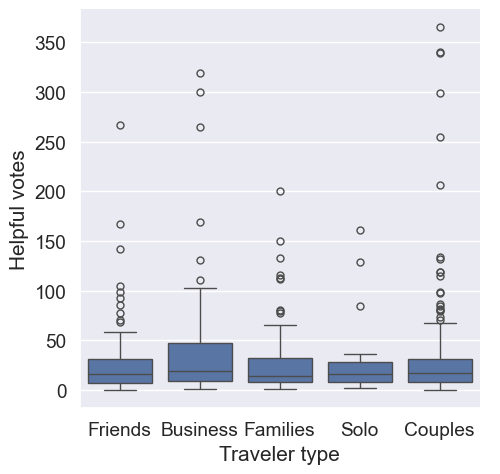

In [41]:
# Set the font size and background
sns.set(font_scale=1.25)
sns.set_style("darkgrid")

# Which 'Traveler type' has left the most 'Helpful' reviews?
sns.catplot(
    x="Traveler type",
    y="Helpful votes",
    data=reviews,
    kind="box"
)

plt.show()

> #### Seaborn bar plots

#### Creating a bar plot

In [42]:
# Print the frequency counts of 'Period of stay'
reviews["Period of stay"].value_counts()

Period of stay
Mar-May    128
Jun-Aug    126
Sep-Nov    126
Dec-Feb    124
Name: count, dtype: int64

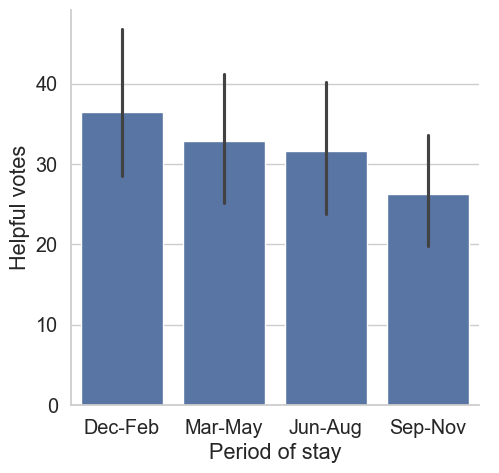

In [43]:
# Create a bar plot of the average number of helpful votes per review across
# the 'Period of stay'
sns.set(font_scale=1.3)
sns.set_style("whitegrid")
sns.catplot(
    x="Period of stay",
    y="Helpful votes",
    data=reviews,
    kind="bar"
)

plt.show()

#### Ordering categories

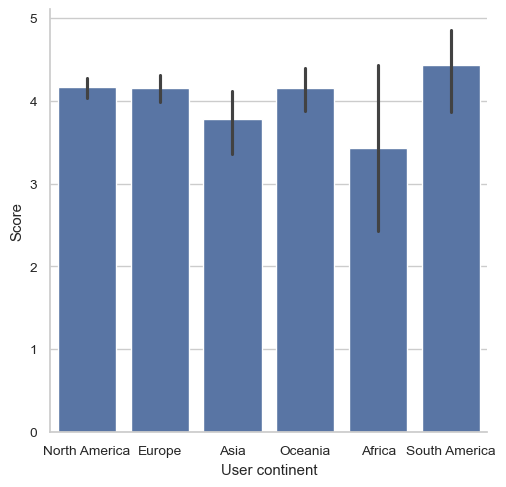

In [44]:
# Create a bar chart
sns.set(font_scale=0.9)
sns.set_style("whitegrid")
sns.catplot(
    x="User continent",
    y="Score",
    data=reviews,
    kind="bar"
)
plt.show()

In [45]:
# Print the frequency counts of 'User continent'
reviews["User continent"].value_counts()

User continent
North America    295
Europe           118
Oceania           41
Asia              36
Africa             7
South America      7
Name: count, dtype: int64

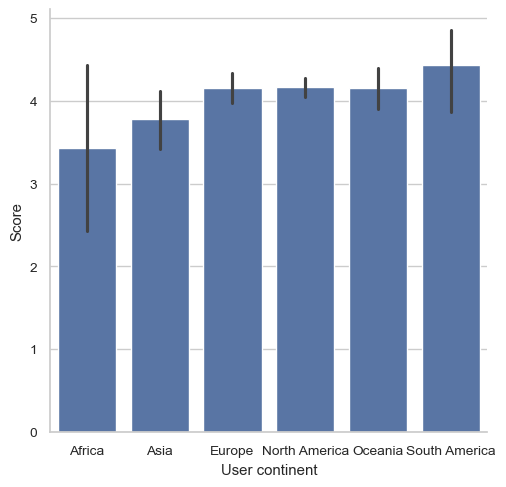

In [46]:
# Convert the 'User continent' Series to categorical and create a bar plot
reviews["User continent"] = reviews["User continent"].astype("category")
sns.catplot(
    x="User continent",
    y="Score",
    data=reviews,
    kind="bar"
)
plt.show()

In [47]:
# Create an ordered list of continents from highest to lowest number of reviews
continent_categories = list(reviews["User continent"].value_counts().index)
continent_categories

['North America', 'Europe', 'Oceania', 'Asia', 'Africa', 'South America']

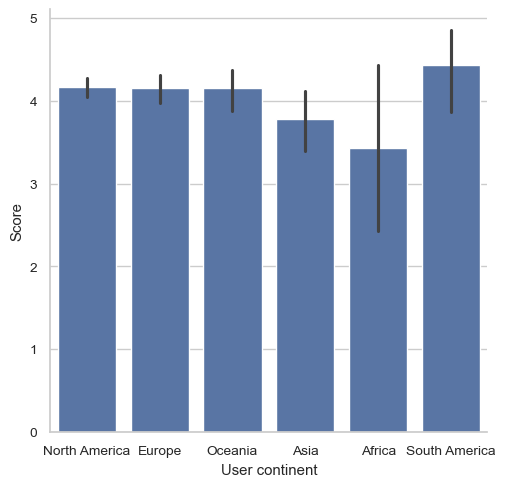

In [48]:
# Reorder "User continent" using continent_categories and rerun the graphic
reviews["User continent"] = reviews["User continent"]\
    .cat.reorder_categories(new_categories=continent_categories)

sns.catplot(
    x="User continent",
    y="Score",
    data=reviews,
    kind="bar"
)
plt.show()

#### Bar plot using hue

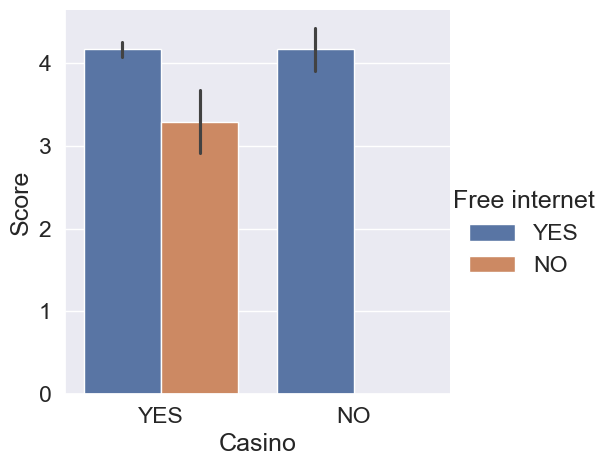

In [49]:
# Split 'Score' using two categorical variables
sns.set(font_scale=1.5)
sns.set_style("darkgrid")
sns.catplot(
    x="Casino",
    y="Score",
    data=reviews,
    kind="bar",
    hue="Free internet"
)
plt.show()

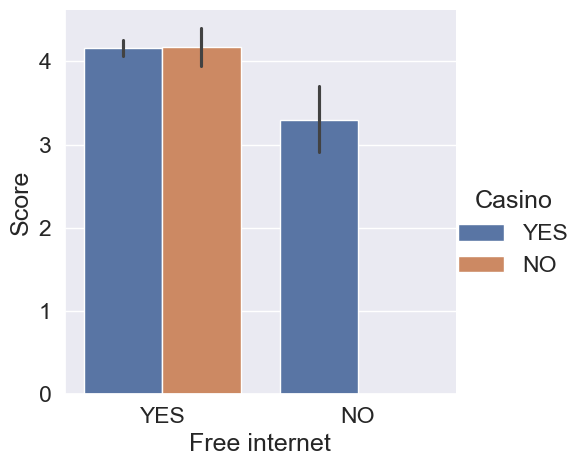

In [50]:
# Switch variables and create another plot
sns.set(font_scale=1.5)
sns.set_style("darkgrid")
sns.catplot(
    x="Free internet",
    y="Score",
    data=reviews,
    kind="bar",
    hue="Casino"
)
plt.show()

> #### Point and count plots

#### Creating a point plot

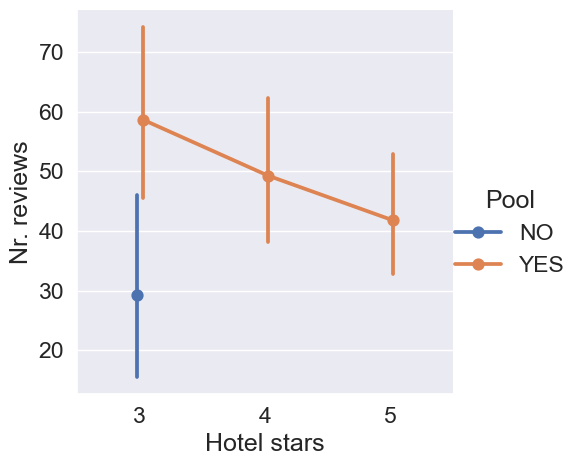

In [51]:
# Create a point plot to show the mean of 'Nr. reviews'
sns.catplot(
    x="Hotel stars",
    y="Nr. reviews",
    data=reviews,
    kind="point",
    hue="Pool",
    dodge=True  # prevents plots from overlapping
)
plt.show()

#### Creating a count plot

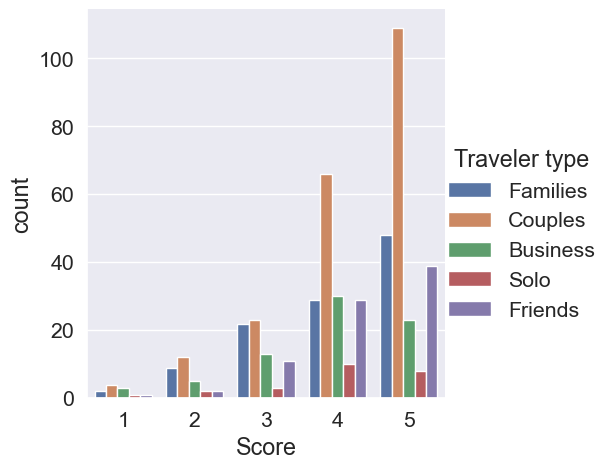

In [52]:
# Plot the 'Score' frequency across 'Traveler type'
sns.set(font_scale=1.4)
sns.set_style("darkgrid")
sns.catplot(
    x="Score",
    data=reviews,
    kind="count",
    hue="Traveler type"
)
plt.show()

> #### Additional catplot() options

#### One visualization per group

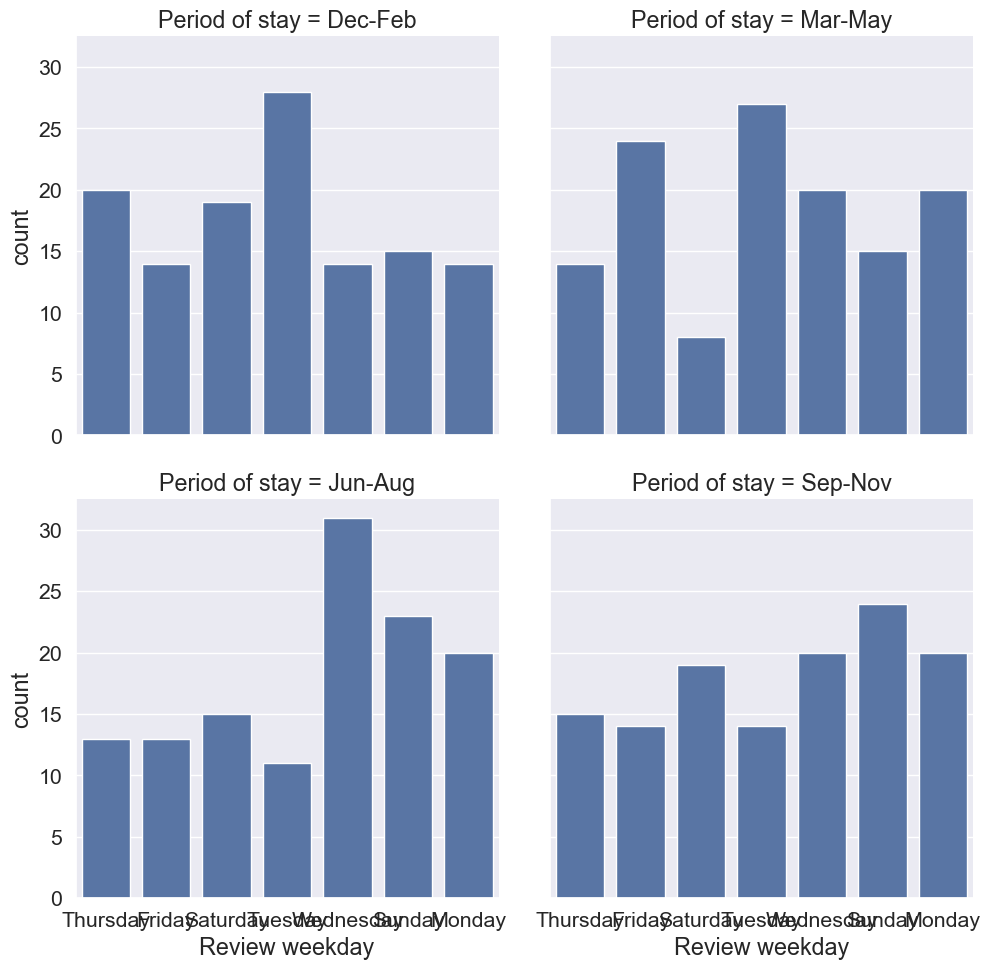

In [53]:
''' Create a catplot() using 'count' as the type of graphic.
Count the number of reviews by 'Review weekday'.
Create individual plots for each 'Period of stay'.
Wrap the plots after every 2nd graphic.
'''

ax = sns.catplot(
    x="Review weekday",
    col="Period of stay",
    col_wrap=2,
    data=reviews,
    kind="count"
)
plt.show()

#### Updating categorical plots

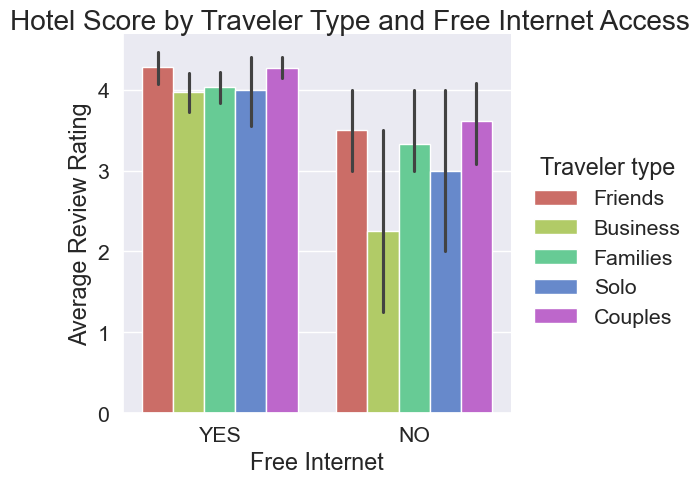

In [54]:
''' Create a plot to investigate if hotels with 'Free internet' receive
higher reviews given the "Traveler type'. Apply seaborn's "hls" color palette.
'''
ax = sns.catplot(
    x="Free internet",
    y="Score",
    hue="Traveler type",
    data=reviews,
    kind="bar",
    palette=sns.color_palette("hls", 5)
)

''' Add a title, update the axis labels, and adjust the starting of the 
graphic to 93% of the full height of the visualization.
'''

ax.fig.suptitle("Hotel Score by Traveler Type and Free Internet Access")
ax.set_axis_labels("Free Internet", "Average Review Rating")
plt.subplots_adjust(top=.93)
plt.show()

### 4. Pitfalls and Encoding

The used cars dataset contains information on over 38,000 used cars including the  
manufacturer, model, and sale price.

In [55]:
used_cars = pd.read_csv("datasets/used_cars.csv")
used_cars.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38531 entries, 0 to 38530
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   manufacturer_name  38531 non-null  object 
 1   model_name         38531 non-null  object 
 2   transmission       38531 non-null  object 
 3   color              38531 non-null  object 
 4   odometer_value     38531 non-null  int64  
 5   year_produced      38531 non-null  int64  
 6   engine_fuel        38531 non-null  object 
 7   engine_has_gas     38531 non-null  bool   
 8   engine_type        38531 non-null  object 
 9   engine_capacity    38521 non-null  float64
 10  body_type          38531 non-null  object 
 11  has_warranty       38531 non-null  bool   
 12  state              38531 non-null  object 
 13  drivetrain         38531 non-null  object 
 14  price_usd          38531 non-null  float64
 15  is_exchangeable    38531 non-null  bool   
 16  location_region    385

> #### Categorical pitfalls

#### Memory usage

In [56]:
''' If each of the columns listed is converted to a categorical Series,
which column will save the most memory?
'''

print(used_cars["drivetrain"].describe(),"\n")

print(used_cars["model_name"].describe())

count     38531
unique        3
top       front
freq      27746
Name: drivetrain, dtype: object 

count      38531
unique      1118
top       Passat
freq        1423
Name: model_name, dtype: object


The "drivetrain" column will save the most memory as it only has  
three different values while "model_name" has over 1,000.

#### Overcoming pitfalls: string issues

The `.str` accessor object and the pandas `apply` method will always convert a  
categorical Series back to an object

In [57]:
used_cars["color"] = used_cars["color"].astype("category")
used_cars["color"] = used_cars["color"].str.upper()
print(used_cars["color"].dtype)

object


#### Overcoming pitfalls: using NumPy arrays

In [58]:
# Convert column to categorical
used_cars["number_of_photos"] = used_cars["number_of_photos"].astype("category")

''' used_cars["number_of_photos"].sum() 

will return TypeError: Categorical cannot perform the operation sum
'''

# To use NumPy array methods, first convert the data type
used_cars["number_of_photos"].astype(int).sum()


371788

> #### Label encoding

#### Create a label encoding and map

Create a label encoding for the `color` column to save on memory and improve performance.  
Reading and writing files that use codes instead of strings can save a lot of time.

In [59]:
# Convert to categorical and print the frequency table
used_cars["color"] = used_cars["color"].astype("category")
used_cars["color"].value_counts()

color
BLACK     7705
SILVER    6852
BLUE      5802
WHITE     4212
GREY      3751
RED       2925
GREEN     2760
OTHER     2688
BROWN      886
VIOLET     463
YELLOW     303
ORANGE     184
Name: count, dtype: int64

In [60]:
# Create a label encoding for the variable 'color' 
used_cars["color_code"] = used_cars["color"].cat.codes

print(used_cars[["color", "color_code"]])

        color  color_code
0      SILVER           8
1        BLUE           1
2         RED           7
3        BLUE           1
4       BLACK           0
...       ...         ...
38526  SILVER           8
38527    BLUE           1
38528    BLUE           1
38529   BLACK           0
38530  SILVER           8

[38531 rows x 2 columns]


In [61]:
# Create a color map using the codes and categories objects
codes = used_cars["color_code"]
categories = used_cars["color"]
color_map = dict(zip(codes, categories))

# Print the new color map
print(color_map)

{8: 'SILVER', 1: 'BLUE', 7: 'RED', 0: 'BLACK', 4: 'GREY', 6: 'OTHER', 2: 'BROWN', 10: 'WHITE', 3: 'GREEN', 9: 'VIOLET', 5: 'ORANGE', 11: 'YELLOW'}


#### Using saved mappings

In [62]:
# Preview the 'color_code' column
used_cars[["color_code"]].head()


,color_code
0,8
1,1
2,7
3,1
4,0


In [63]:
# Map the color codes back to their categorical names
used_cars["color_code"].map(color_map)

0        SILVER
1          BLUE
2           RED
3          BLUE
4         BLACK
          ...  
38526    SILVER
38527      BLUE
38528      BLUE
38529     BLACK
38530    SILVER
Name: color_code, Length: 38531, dtype: object

#### Creating a Boolean encoding

In [64]:
# Print frequency table
used_cars["manufacturer_name"].value_counts()

manufacturer_name
Volkswagen    4243
Opel          2759
BMW           2610
Ford          2566
Renault       2493
              ... 
Cadillac        43
Pontiac         42
ЗАЗ             42
Lincoln         36
Great Wall      36
Name: count, Length: 55, dtype: int64

In [65]:
# Create a Boolean column, with 0s and 1s, if manufacturer name is 'Volkswagen'
used_cars["is_volkswagen"] = np.where(
    used_cars["manufacturer_name"].str.contains("Volkswagen", regex=False), 1, 0
)

# Print the frequency table of the new column
used_cars["is_volkswagen"].value_counts()

is_volkswagen
0    34288
1     4243
Name: count, dtype: int64

> #### One-hot encoding

One-hot encoding is a process used to convert categorical data into a binary (0 or 1)  
representation. 

It is commonly used in machine learning and data preprocessing because  
many algorithms require numerical input and cannot work directly with categorical data.

#### One-hot encoding specific columns

In [71]:
''' Create a new dataset, "used_cars_simple", with one-hot encoding for the columns:  
"manufacturer_name" and "transmission".
Set the prefix of all new columns to "dummy".
'''
used_cars = pd.read_csv("datasets/used_cars.csv")
used_cars_simple = pd.get_dummies(
    used_cars, columns=["manufacturer_name", "transmission"], prefix="dummy"
)

used_cars_simple.shape

(38531, 85)